<a href="https://colab.research.google.com/github/dwds186/alphaco_test/blob/main/1001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google colab 한글 폰트 설치

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [9]:
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


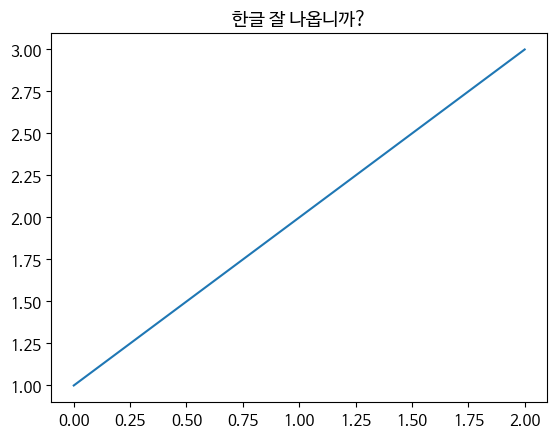

In [10]:
plt.plot([1,2,3])
plt.title("한글 잘 나옵니까?")
plt.show()

03/02, 03/03 컬럼만 int형으로 변경하세요.

In [4]:
import pandas as pd

# 데이터프레임 생성
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = pd.DataFrame(data=data, columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      object
 1   03/03   3 non-null      object
 2   03/04   3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [5]:
# Convert columns to integers
df["03/02"] = df["03/02"].str.replace(',', '').astype(int)
df["03/03"] = df["03/03"].str.replace(',', '').astype(int)

# Display the modified DataFrame and its info
print("\nModified DataFrame:")
print(df)
print("\nModified DataFrame info:")
df.info()


Modified DataFrame:
   03/02  03/03  03/04
0   1000   1100  1,510
1   1410   1420  1,790
2    850    900  1,185

Modified DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      int64 
 1   03/03   3 non-null      int64 
 2   03/04   3 non-null      object
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [ ]:
#선생님 해설
#쉼표를 제거하고 int로 변환하는 함수 정의

#단계별로 차근차근 가봅시다
x="1,000"
int(x.replace(",",''))

1000

In [ ]:
def rm_comma(x):
    return int(x.replace(",",''))

y="2,000"
print(rm_comma(y))

2000


In [ ]:
df["03/02"]=df["03/02"].apply(rm_comma)
df["03/03"]=df["03/03"].apply(rm_comma)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      int64 
 1   03/03   3 non-null      int64 
 2   03/04   3 non-null      object
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [6]:
#구글 코랩과 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')


#데이터 불러오기
import pandas as pd

# 파일 경로를 설정하세요 (예: 'My Drive/your_file.csv')
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/'
estate = pd.read_csv(DATA_PATH+'seoul_real_estate.csv')

# 데이터프레임 확인
#print(estate)
estate

Mounted at /content/drive


,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,2023,11290,성북구,13900,석관동,1.0,대지,10.0,0.0,두산,...,97000,164.92,0.00,5.0,NaN,NaN,1998.0,아파트,중개거래,서울 성북구
10996,2023,11740,강동구,10900,천호동,1.0,대지,201.0,3.0,이스투아빌,...,37900,40.47,26.60,5.0,NaN,NaN,2023.0,연립다세대,직거래,NaN
10997,2023,11350,노원구,10300,공릉동,1.0,대지,747.0,0.0,두산힐스빌아파트,...,85000,114.72,0.00,13.0,NaN,NaN,2000.0,아파트,중개거래,서울 노원구
10998,2023,11500,강서구,10200,등촌동,1.0,대지,707.0,0.0,"등촌7,8단지주공아파트",...,50000,41.85,0.00,7.0,NaN,NaN,1994.0,아파트,중개거래,"서울 강서구, 서울 도봉구"


구글 colab을 켠 김에 여기서 계속 작업하도록 하겠습니다

matplotlib
seaborn - 맷플롯이 너무 어려워서 간단하게 만든게 seaborn

In [7]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

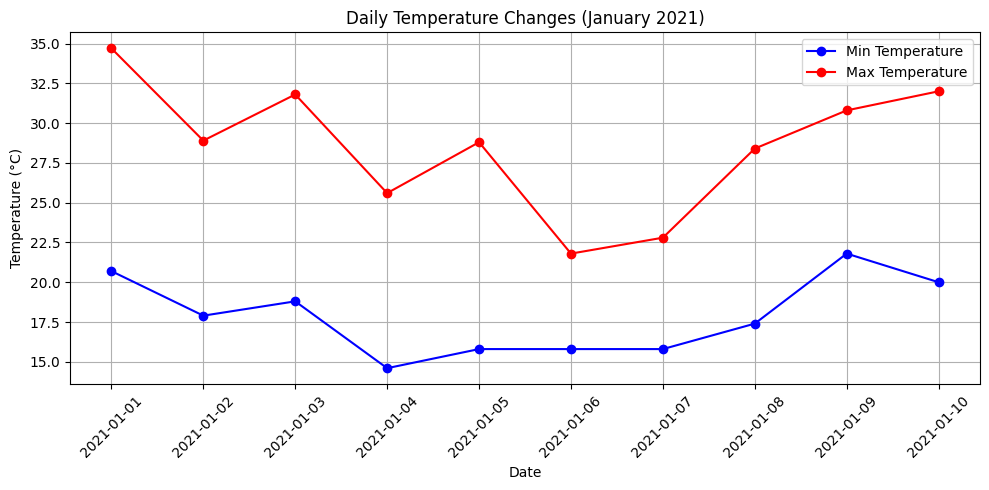

In [8]:
# Plot settings
plt.figure(figsize=(10, 5))
plt.plot(dates, min_temperature, marker='o', label='Min Temperature', color='blue')
plt.plot(dates, max_temperature, marker='o', label='Max Temperature', color='red')

# Customize the plot
plt.title('Daily Temperature Changes (January 2021)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

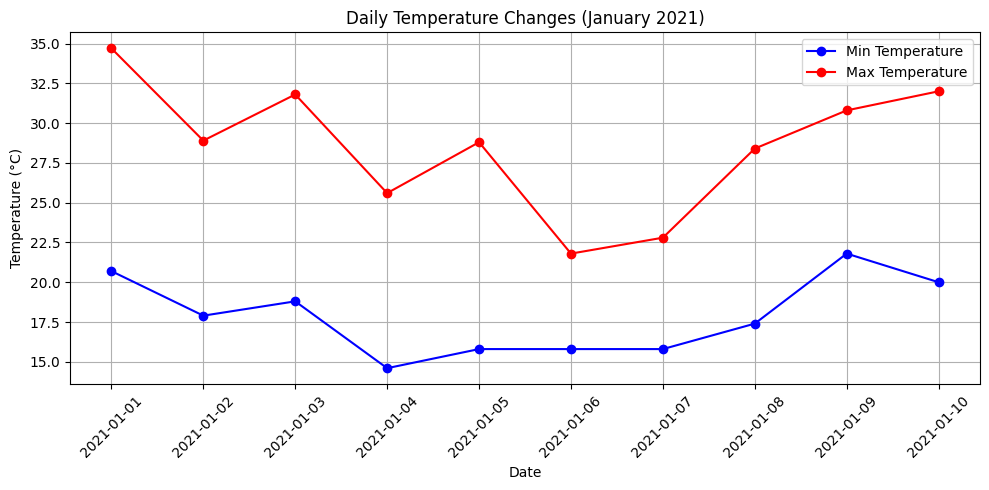

In [ ]:
import matplotlib.pyplot as plt

class TemperaturePlot:
    def __init__(self, dates, min_temps, max_temps):
        self.dates = dates
        self.min_temps = min_temps
        self.max_temps = max_temps

    def create_plot(self):
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 5))

        # Plot minimum and maximum temperatures
        ax.plot(self.dates, self.min_temps, marker='o', label='Min Temperature', color='blue')
        ax.plot(self.dates, self.max_temps, marker='o', label='Max Temperature', color='red')

        # Customize the plot
        ax.set_title('Daily Temperature Changes (January 2021)')
        ax.set_xlabel('Date')
        ax.set_ylabel('Temperature (°C)')
        ax.set_xticks(self.dates)
        ax.set_xticklabels(self.dates, rotation=45)
        ax.legend()
        ax.grid(True)

        # Display the plot
        plt.tight_layout()
        plt.show()

# Data
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# Create an instance of the TemperaturePlot class and create the plot
temp_plot = TemperaturePlot(dates, min_temperature, max_temperature)
temp_plot.create_plot()


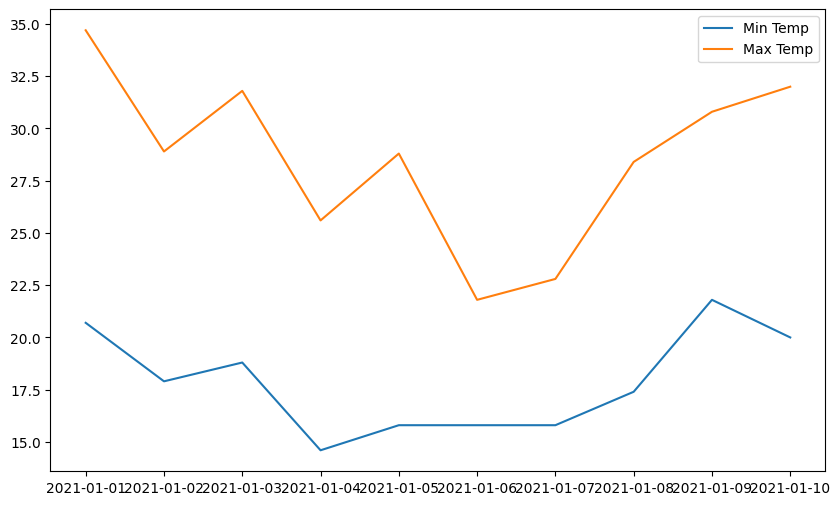

In [ ]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

#도화지 만들기
#fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
#plt.show()

#도화지 만들기
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
#print(type(ax)) #<class 'matplotlib.axes._axes.Axes'>
ax.plot(dates, min_temperature, label="Min Temp")
ax.plot(dates, max_temperature, label="Max Temp")
ax.legend()
plt.show()

In [ ]:
print(fig)
print(ax)
#보면 알겠지만 해당 내용이 쉽지 않음

Figure(1000x600)
Axes(0.125,0.11;0.775x0.77)


#Yahoo API에서 무료 주식 데이터 가져오기

[*********************100%***********************]  1 of 1 completed


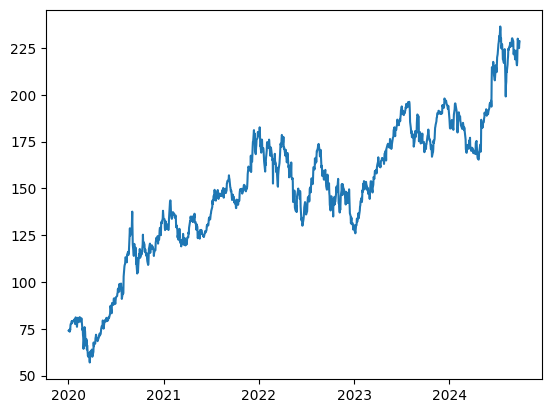

In [ ]:
import yfinance as yf
data=yf.download("AAPL", start="2020-01-01",end='2024-09-30')
data

fig,ax=plt.subplots()
ax.plot(data['Open'])
plt.show()

In [ ]:
#x축은Date가현재index임
data['Open'].head(1)

,Open
Date,
2020-01-02,74.059998


In [ ]:
data2 = data.copy()

data2 = data.reset_index() #이제index가 날짜가 아니라 0부터 시작함
data2.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400


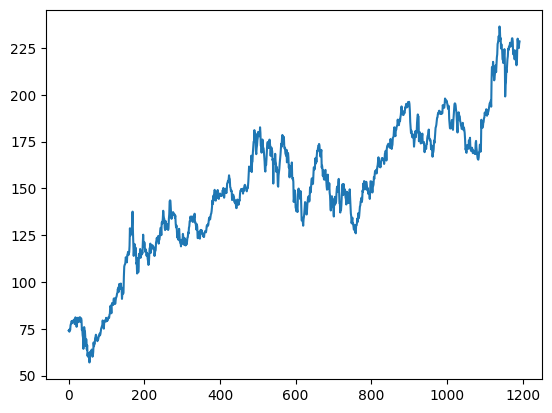

In [ ]:
fig,ax=plt.subplots()
ax.plot(data2['Open'])
plt.show()

In [ ]:
#미션
#AAPL 주식
#엔비디아(NVDA) 주식 2개 불러와서
#동시에 라인 차트 그리기

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


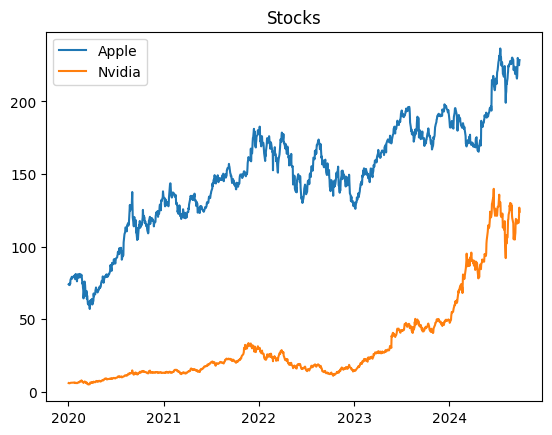

In [ ]:
import yfinance as yf

apple=yf.download("AAPL", start="2020-01-01",end='2024-09-30')
nvidia=yf.download("NVDA", start="2020-01-01",end='2024-09-30')
intel=yf.download("INTC", start="2020-01-01",end='2024-09-30')


fig,ax=plt.subplots()
ax.plot(apple['Open'], label = "Apple")
ax.plot(nvidia['Open'], label = "Nvidia")
ax.legend()
ax.set_title("Stocks")

plt.show()

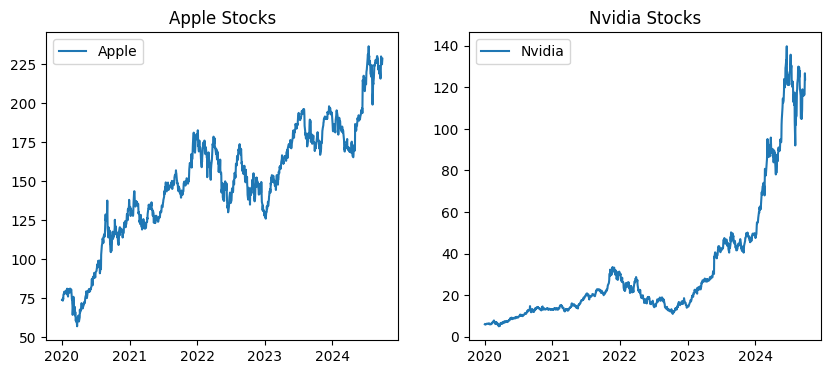

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

ax[0].set_title("Apple Stocks")
ax[1].set_title("Nvidia Stocks")

ax[0].plot(apple['Open'], label = "Apple")
ax[1].plot(nvidia['Open'], label = "Nvidia")

ax[0].legend()
ax[1].legend()

plt.show()

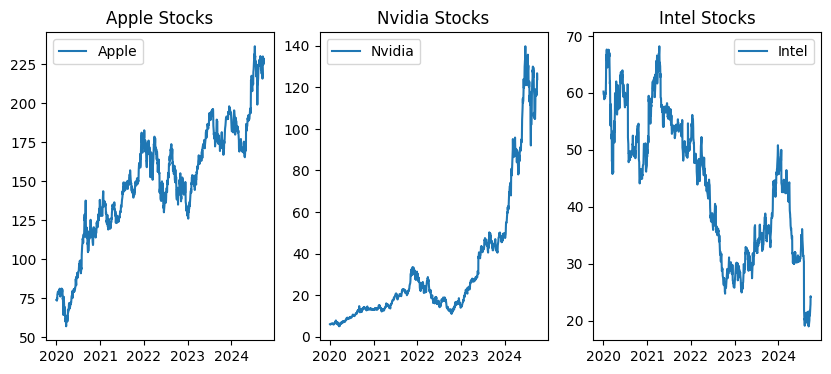

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,4))

ax[0].set_title("Apple Stocks")
ax[1].set_title("Nvidia Stocks")
ax[2].set_title("Intel Stocks")

ax[0].plot(apple['Open'], label = "Apple")
ax[1].plot(nvidia['Open'], label = "Nvidia")
ax[2].plot(intel['Open'], label = "Intel")


ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()

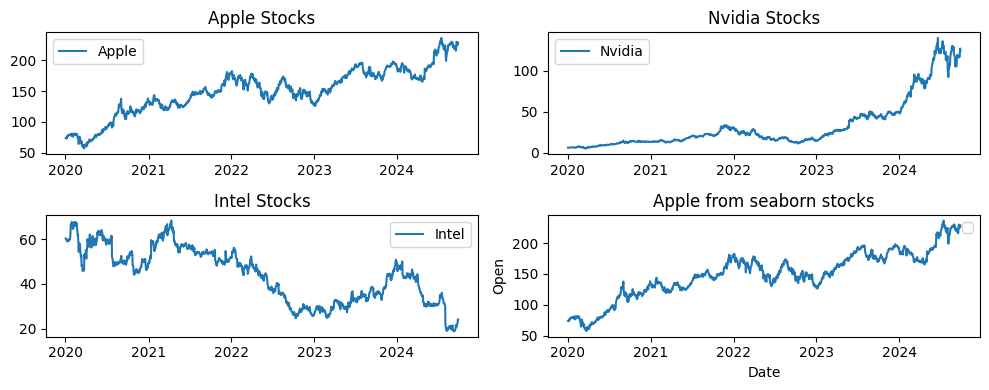

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,4))
apple2 = apple.reset_index()

ax[0][0].set_title("Apple Stocks")
ax[0][1].set_title("Nvidia Stocks")
ax[1][0].set_title("Intel Stocks")
ax[1][1].set_title("Apple from seaborn stocks") #seaborn으로 한 줄 컷

ax[0][0].plot(apple['Open'], label = "Apple")
ax[0][1].plot(nvidia['Open'], label = "Nvidia")
ax[1][0].plot(intel['Open'], label = "Intel")
sns.lineplot(data=apple2, x='Date', y='Open', ax=ax[1,1])

fig.tight_layout() # 그래프가 겹치지 않도록 약간씩 알아서 자동으로 띄워줌

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.savefig("myStocks.png")
plt.show()

In [ ]:
import seaborn as sns


In [ ]:
apple2 = apple.reset_index()
apple2.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400


<Axes: xlabel='Date', ylabel='Open'>

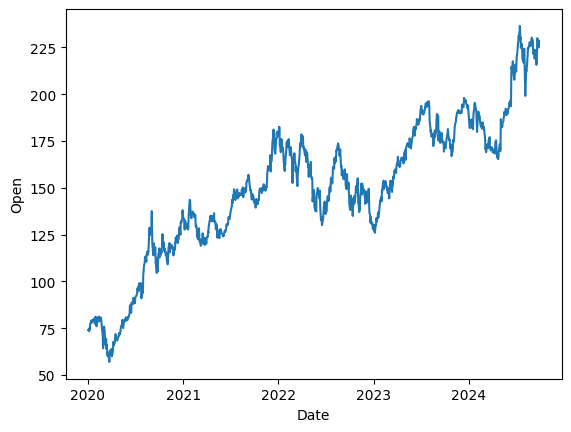

In [ ]:
sns.lineplot(data=apple2, x='Date', y='Open')

메소드의 매개변수에 ax가 있으면 해당 seaborn은 mat과 연관 있음

https://seaborn.pydata.org/generated/seaborn.lineplot.html

after lunch

## 문제1 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : matplotlib.pyplot.bar
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요.



## 문제2 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- matplotlib.pyplot.scatter

In [14]:
#구글 코랩과 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')


#데이터 불러오기
import pandas as pd

# 파일 경로를 설정하세요 (예: 'My Drive/your_file.csv')
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/'
estate = pd.read_csv(DATA_PATH+'seoul_real_estate.csv')

# 데이터프레임 확인
#print(estate)
estate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,2023,11290,성북구,13900,석관동,1.0,대지,10.0,0.0,두산,...,97000,164.92,0.00,5.0,NaN,NaN,1998.0,아파트,중개거래,서울 성북구
10996,2023,11740,강동구,10900,천호동,1.0,대지,201.0,3.0,이스투아빌,...,37900,40.47,26.60,5.0,NaN,NaN,2023.0,연립다세대,직거래,NaN
10997,2023,11350,노원구,10300,공릉동,1.0,대지,747.0,0.0,두산힐스빌아파트,...,85000,114.72,0.00,13.0,NaN,NaN,2000.0,아파트,중개거래,서울 노원구
10998,2023,11500,강서구,10200,등촌동,1.0,대지,707.0,0.0,"등촌7,8단지주공아파트",...,50000,41.85,0.00,7.0,NaN,NaN,1994.0,아파트,중개거래,"서울 강서구, 서울 도봉구"


## 문제1 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : matplotlib.pyplot.bar
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요.

In [13]:
estate['SGG_NM'].value_counts()

,count
SGG_NM,
은평구,882
강서구,808
강동구,706
송파구,701
동대문구,550
구로구,513
노원구,511
양천구,502
강남구,489


https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

In [15]:
import matplotlib.pyplot as plt
count_df=estate["SGG_NM"].value_counts()
type(count_df)

pandas.core.series.Series

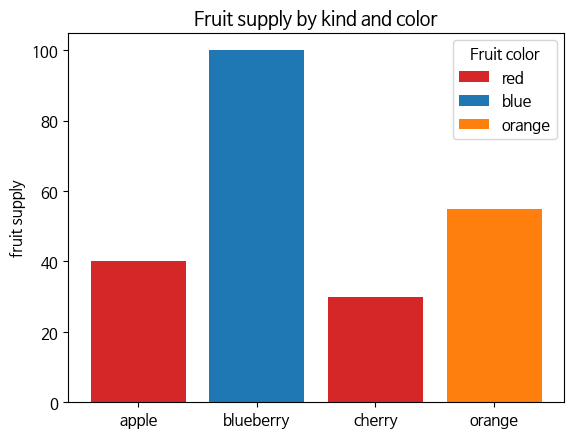

In [16]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

matplotlib가 어려운 이유
-gap이 존재함
-(오피셜 사이트 등에서의) 예제는 십중팔구, 리스트 형태로 예시 나와 있음

그런데 우리가 현실적으로 다루어야 하는 데ㅣ터는 series, pandas임

그러면 우리는 series와 pandas 형태를 수단과 방법을 가리지 말고, 리스트로 변경해야 함


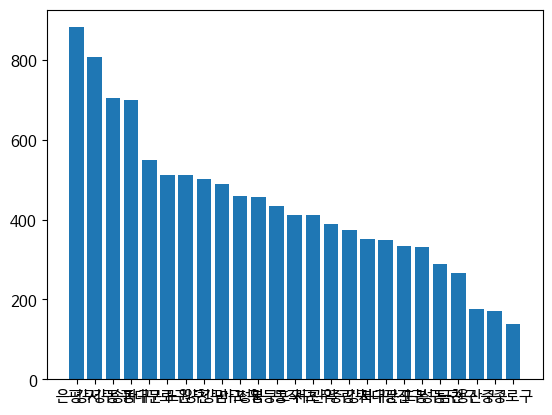

In [20]:
import matplotlib.pyplot as plt

#데이터 수집
estate

#데이터 가공
count_df=estate["SGG_NM"].value_counts()
자치구=list(count_df.index)
건수=list(count_df.values)
#실무에서는 데이터 가공 코드가 엄청 길어짐

#데이터 수집과 시각화 코드는 회사별 기존 코드 거의 재활용 함


#시각화
fig, ax = plt.subplots()
ax.bar(자치구,건수)

plt.show()

## 문제2 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- matplotlib.pyplot.scatter

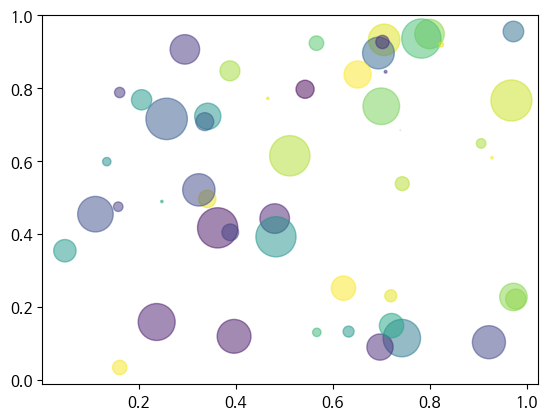

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [36]:
highest_values=estate['BLDG_AREA'] >= 900
estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values]

(2796     1125.97
 4331      994.89
 10451    1664.83
 Name: BLDG_AREA, dtype: float64,
 2796     260000
 4331     690000
 10451    545000
 Name: OBJ_AMT, dtype: int64)

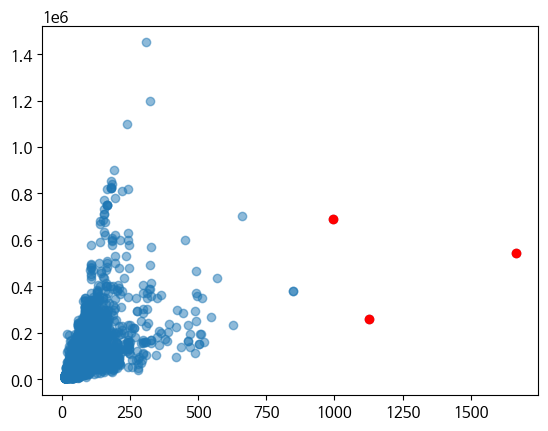

In [44]:
# 새로운 플롯 시작
fig, ax = plt.subplots()
ax.scatter(estate['BLDG_AREA'], estate['OBJ_AMT'], alpha = 0.5)
ax.scatter(estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values], color="red")
plt.show()

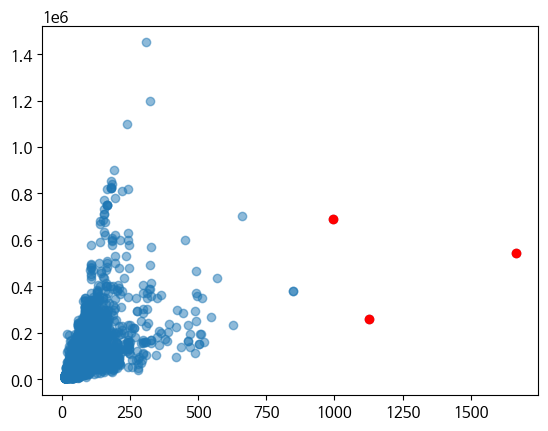

In [45]:
#코드 한 번에 모아 보기


estate.loc[estate['BLDG_AREA'] >= 900, :]
highest_values = estate['BLDG_AREA'] >= 900
estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values]

# 새로운 플롯 시작
fig, ax = plt.subplots()
ax.scatter(estate['BLDG_AREA'], estate['OBJ_AMT'], alpha = 0.5)
ax.scatter(estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values], color = 'red')
plt.show()

이번엔 seaborn으로!!!!!!!!!!!!!!!!!!!!!!!!1


## 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : seaborn.barplot
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요.
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- sns.scatterplot

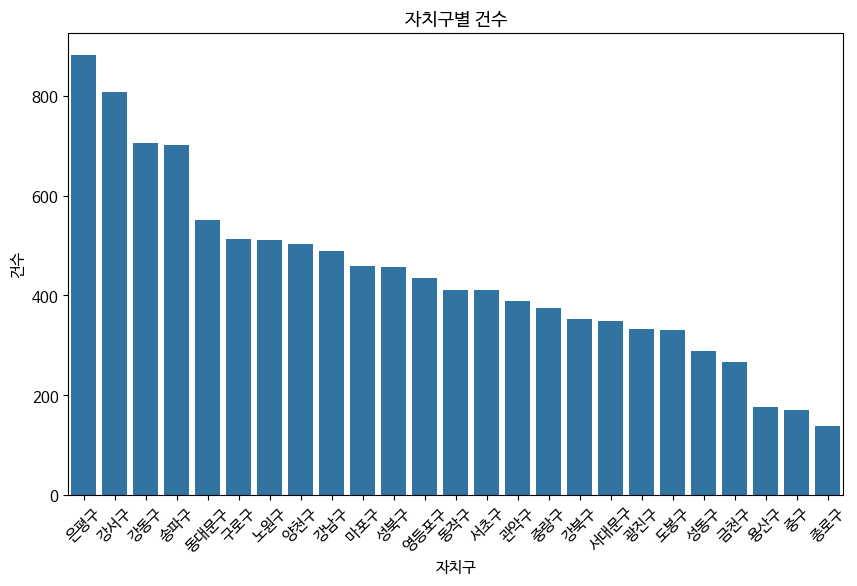

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 수집
estate

# 데이터 가공
count_df = estate["SGG_NM"].value_counts().reset_index()
count_df.columns = ['자치구', '건수']  # 컬럼 이름 변경

# 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(data=count_df, x='자치구', y='건수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.title('자치구별 건수')
plt.xlabel('자치구')
plt.ylabel('건수')

plt.show()


13 Top Python Chart Libraries for Effective Data Visualization | Luzmo
Python is one of the most popular programming languages in the world and it can be used to analyze and visualize data. Here are the best Python chart libraries for the job. (138kB)


https://www.luzmo.com/blog/python-chart-libraries

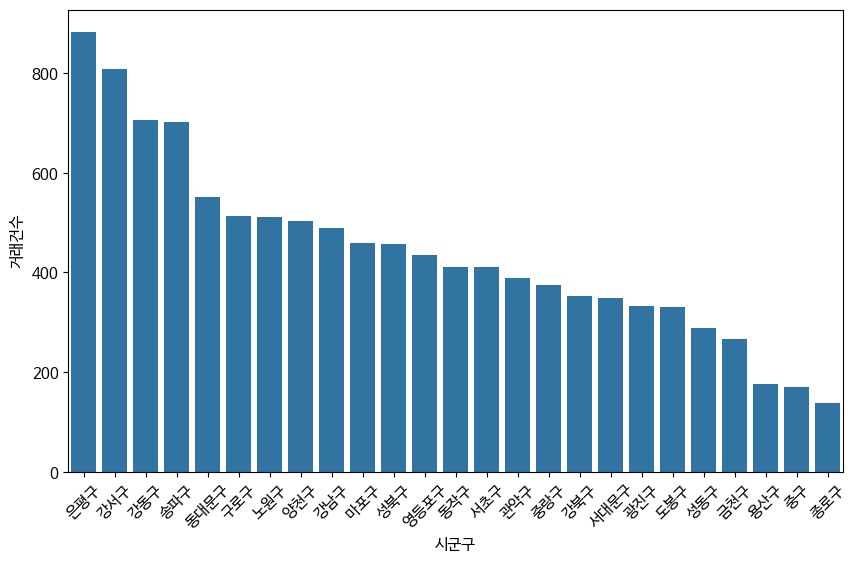

In [52]:
#선생님이랑 같이
sgg_count = estate['SGG_NM'].value_counts().reset_index()
sgg_count.columns = ['시군구', '거래건수']
sgg_count.head(1)

fig,ax=plt.subplots(figsize=(10,6))

sns.barplot(sgg_count, x="시군구", y='거래건수')

plt.xticks(rotation=45)
plt.show()

## 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- sns.scatterplot

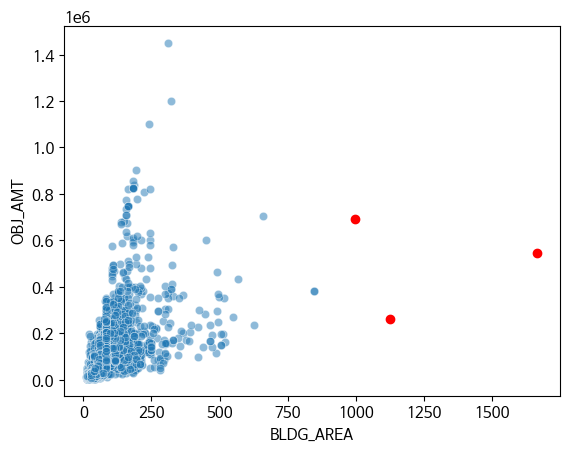

In [55]:
fig,ax=plt.subplots()
sns.scatterplot(data=estate, x='BLDG_AREA', y='OBJ_AMT', alpha=0.5)

ax.scatter(estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values], color = 'red')
plt.show()

#matplotlib 옵션 설정

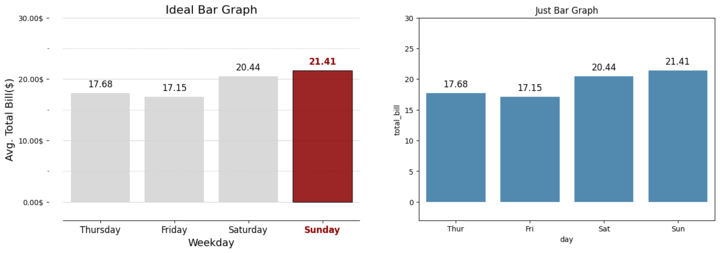

https://matplotlib.org/stable/api/ticker_api.html

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FuncFormatter
import seaborn as sns
import numpy as np

tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


https://seaborn.pydata.org/generated/seaborn.catplot.html

In [92]:
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

In [106]:
group_mean=tips.groupby(['day'])['total_bill'].agg("mean")
#group_mean
#group_mean.sort_values(ascending=False)
h_day=group_mean.sort_values(ascending=False).index[0]
h_mean=np.round(group_mean.sort_values(ascending=False)[0],2)
h_day, h_mean

<ipython-input-106-a7b37449da24>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean=tips.groupby(['day'])['total_bill'].agg("mean")
<ipython-input-106-a7b37449da24>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_mean=np.round(group_mean.sort_values(ascending=False)[0],2)


('Sun', 21.41)

높이 17.682741935483868 너비 0.8
높이 17.15157894736842 너비 0.7999999999999999
높이 20.441379310344825 너비 0.7999999999999998
높이 21.41 너비 0.7999999999999998
높이 17.682741935483868 너비 0.8
높이 17.15157894736842 너비 0.7999999999999999
높이 20.441379310344825 너비 0.7999999999999998
높이 21.41 너비 0.7999999999999998


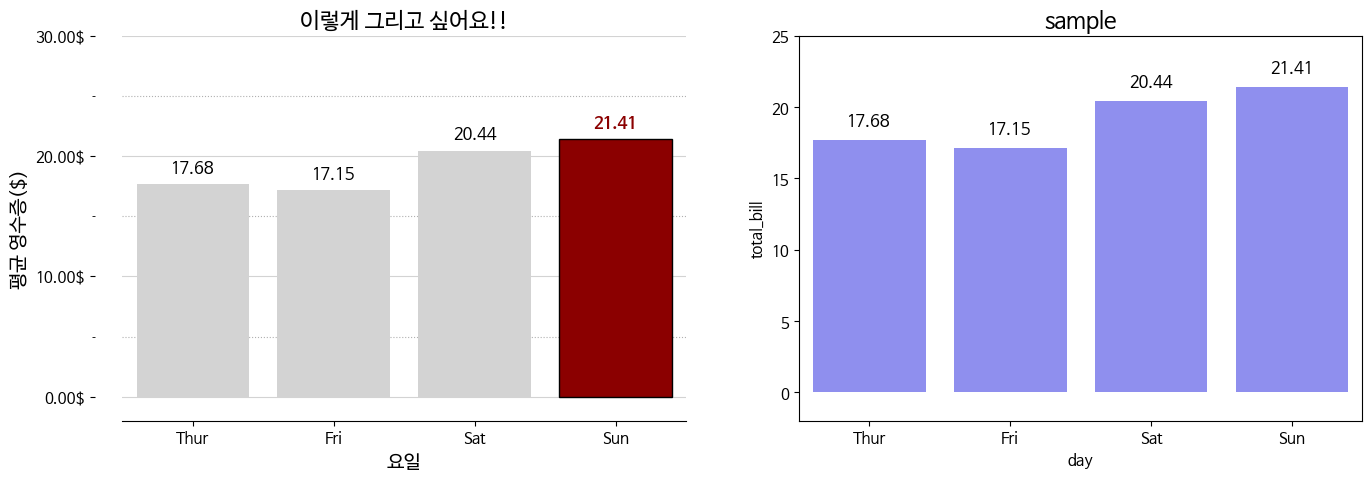

In [108]:
# 객체 지향 선언
fig, ax =plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
sns.barplot(data = tips,
            x = "day",
            y = "total_bill",
            errorbar=None,
            color = 'lightgray',
            alpha = 1,
            zorder = 2,
            ax = ax[0])

for p in ax[0].patches:
  # print("여기 확인 필요:", p, type(p))
  print("높이", p.get_height(), "너비", p.get_width())
  height = np.round(p.get_height(), 2)
  fontweight = "normal"
  color = "k"
  if h_mean == height:
    fontweight = "bold"
    color = "darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")

  ax[0].text(p.get_x() + p.get_width()/2,
             height + 1,
             height, ha = 'center', size=12,
             fontweight=fontweight, color=color)

# 옵션
ax[0].set_title("이렇게 그리고 싶어요!!", size = 16)
ax[0].set_ylim(-2,30)

#spines 항목 정리
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
#ax[0].spines['bottom'].set_visible(False)


ax[0].spines['left'].set_position(("outward",20))


#y축 정리
ax[0].yaxis.set_major_locator(MultipleLocator(10)) #큰눈금은 10간격으로 주겠다
ax[0].yaxis.set_major_formatter(formatter) #20.00$
ax[0].yaxis.set_minor_locator(MultipleLocator(5)) #작은눈금은 5단위로 주겠다

#축 라벨 지정
ax[0].set_ylabel('평균 영수증($)', fontsize=14)
ax[0].set_xlabel('요일', fontsize=14)

ax[0].grid(axis='y', which='major',color='lightgray')
ax[0].grid(axis='y', which='minor',ls=':')




















#여기서부터#여기서부터#여기서부터#여기서부터#여기서부터#여기서부터#여기서부터#여기서부터
#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프
#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프#오른쪽 그래프

sns.barplot(data = tips,
            x = "day",
            y = "total_bill",
            errorbar=None,
            color = 'blue',
            alpha = 0.5,
            zorder = 2,
            ax = ax[1])

for p in ax[1].patches:
  # print("여기 확인 필요:", p, type(p))
  print("높이", p.get_height(), "너비", p.get_width())
  height = np.round(p.get_height(), 2)
  ax[1].text(p.get_x() + p.get_width()/2, height + 1, height, ha = 'center', size=12)

# 옵션
ax[1].set_title("sample", size = 16)
ax[1].set_ylim(-2,25)













plt.show()

https://matplotlib.org/stable/api/spines_api.html

https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/
Pega DevlogPega Devlog
Spines & Grids
착시를 줄여주는 축과 격자를 설정하는 방법입니다. matplotlib에서는 Axes.spines와 Axes.grid 객체를 통해 제어합니다. Claus Wilke, “데이터 시각화 교과서”, 영문판(Free)Colin Ware “데이터 시각화, 인지과학을 만나다”White Paper-Principles of Data Visualization-What
2020년 8월 27일

https://jehyunlee.github.io/2023/01/01/Python-DS-125-rpa/
Pega DevlogPega Devlog
Impact of RPA
RPA(Robotic Process Automation: 업무 자동화) 과제를 하려고 합니다. RPA를 적용하면 효용이 얼마나 좋은지를 설득하기 위한 그림을 그립니다. RPA 도입 전과 후를 비교하는 그림을 그려서 보여줍시다. 1. 행정 업무 어떤 가상의 데이터 관련 행정 업무가 있다고 합시다. 현재는 총 2천만원의 용역비를 포함해 12주가 걸립니다

3. 활용
관련기사: 전자신문- NST, 출연연 연구행정혁신 성과확산 공모전 시상식 개최

이렇게 정리된 그림은 적절한 표, 근거 자료와 함께 보고서와 ppt에 삽입하면 좋습니다.
그냥 파워포인트에서 그리면 더 쉽지 않냐고 하실 수 있습니다.
경험상 이런 일은 현업 부서에서 수치가 수차례 변경되는 것이 일반적이고, 실제로 열번쯤 바뀐 것 같습니다.
일일이 새로 그렸다면 너무 힘들었을테지만 코드로 그린 덕택에 그때마다 데이터만 바꿔 끼웠습니다.
위 그림은 실제로 최근 있었던 한 공모전에서 서류 작성과 발표 자료에 사용했습니다.

데이터는 제가 접한 실제 사례와 다르게 바꾸었습니다만, 전반적인 틀은 살렸습니다.
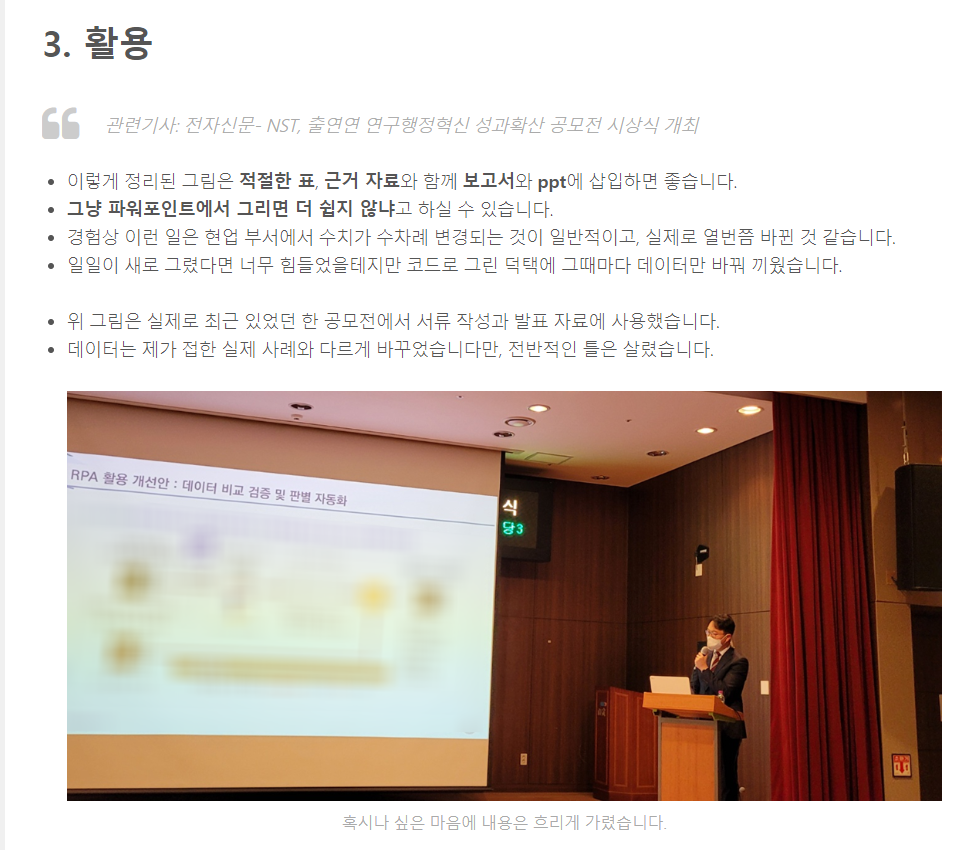